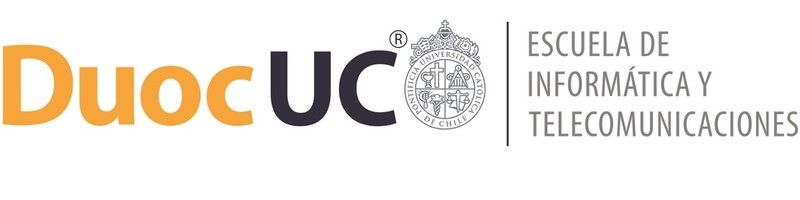

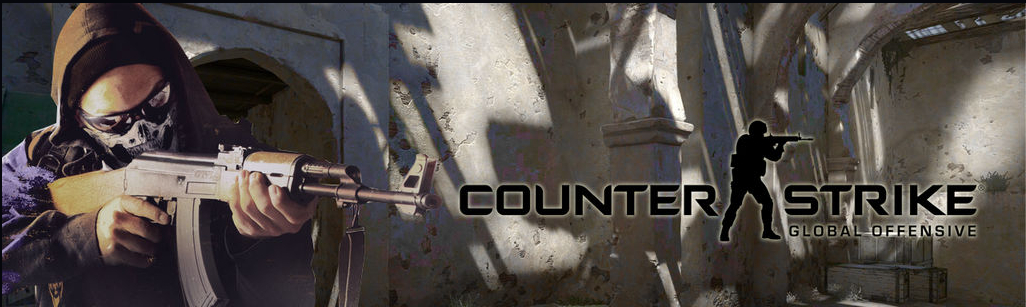

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
*
*

Docente:

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Gana","Pierde"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

In [ ]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
pd.set_option('display.max_columns', None)
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",None)
import math as mat

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import datetime as dt
import missingno as msno

%matplotlib inline




In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")
df.head()

Saving Anexo ET_demo_round_traces.csv to Anexo ET_demo_round_traces (1).csv


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
df.shape

(79157, 30)

Este codigo nos entrega el total de columnas que es 30 y el total de filas que es 79157

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Variables :
Las variables Cuantitativa discreta son las de tipo int64 son 17.
Las variables Cuantitativa continua son las de tipo float64 son 4.
Las variables Cualitativas son la de tipo object  son 7 por ejemplo algunas son : TimeAlive , TravelledDistancen,MatchWinner.
Las variables cualitativa nominal logica son los booleanos son 2 ,por ejemplo surviver, AbnormalMatch.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

Estas son las 30 columnas del dataframe.

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [ ]:
#Moda de todas las columnas
df.mode()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,2.0,29.0,1.0,False,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4700.0,23500.0,2.0,0.0,0.0,1.0
1,601,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,602,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,603,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,604,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79153,123776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79154,123777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79155,123778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mediana de todas las columnas
df.median()

Unnamed: 0                     56720.0
InternalTeamId                     2.0
MatchId                          236.0
RoundId                           12.0
MatchWinner                        0.0
Survived                           0.0
AbnormalMatch                      0.0
RLethalGrenadesThrown              0.0
RNonLethalGrenadesThrown           1.0
PrimaryAssaultRifle                1.0
PrimarySniperRifle                 0.0
PrimaryHeavy                       0.0
PrimarySMG                         0.0
PrimaryPistol                      0.0
RoundKills                         0.0
RoundAssists                       0.0
RoundHeadshots                     0.0
RoundFlankKills                    0.0
RoundStartingEquipmentValue     4700.0
TeamStartingEquipmentValue     22550.0
MatchKills                         8.0
MatchFlankKills                    1.0
MatchAssists                       1.0
MatchHeadshots                     3.0
dtype: float64

In [ ]:
# Usaremos un método resumen de estadísticas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


 ## Analisis estadistico descriptiva e inferencial




 Donde se encuentran los datos mas concentrados alrededor de la media es la variable PrimarySniperRiflees, ya que es la std mas baja y el la variable mas homogenea y representativa en la muestra.La variable con los datos mas disperso con respecto a la media es TeamStartingEquipmentValue con un valor de 9743.203024.

La variable Matchkills se infiere que su media y su mediana son valores cercanos pero la moda es totamente diferente y se ubica a la izquierda de la media, lo cual nos indica que la distribucion es asimetrica hacia  la derecha.

In [ ]:
df['MatchKills'].quantile([.25, .5, .75])

0.25     3.0
0.50     8.0
0.75    13.0
Name: MatchKills, dtype: float64

Los MatchKills  estan por debajo o igual a 3 que representa el 25% de kills que se realizan en una partida del juego,El 25 % de las partidas tienen 3 o menos asesinatos.
El 50% de los MatchKills estan entre 3 y 13 kills por partida, el 50% de las partidas tiene 8 o menos asesinatos.
En la partida del juego el 75% de kill es de menor o igual a 13 kills.




In [ ]:
corr_matrix = df.corr()
corr_matrix["MatchKills"].sort_values(ascending=False)

MatchKills                     1.000000
MatchHeadshots                 0.831450
RoundId                        0.807501
MatchFlankKills                0.641599
MatchAssists                   0.510016
RoundKills                     0.183402
RoundStartingEquipmentValue    0.179080
TeamStartingEquipmentValue     0.178526
RoundHeadshots                 0.112018
RLethalGrenadesThrown          0.110577
InternalTeamId                 0.109532
RNonLethalGrenadesThrown       0.099642
PrimaryAssaultRifle            0.095224
RoundFlankKills                0.078891
PrimarySniperRifle             0.069314
Survived                       0.059445
Unnamed: 0                     0.009537
MatchId                        0.008026
RoundAssists                   0.003477
PrimaryHeavy                  -0.009765
PrimarySMG                    -0.021469
PrimaryPistol                 -0.147026
AbnormalMatch                       NaN
Name: MatchKills, dtype: float64

En este caso estudiamos la variable MatchKills para identificar variables de estudio que tengan un mejor relacion lineal positiva.
Las variables que mas se ajustan con MatchKills correlacion directa son MatchHeadshots  r= 0.831450
MatchFlankKills              r=  0.641599

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

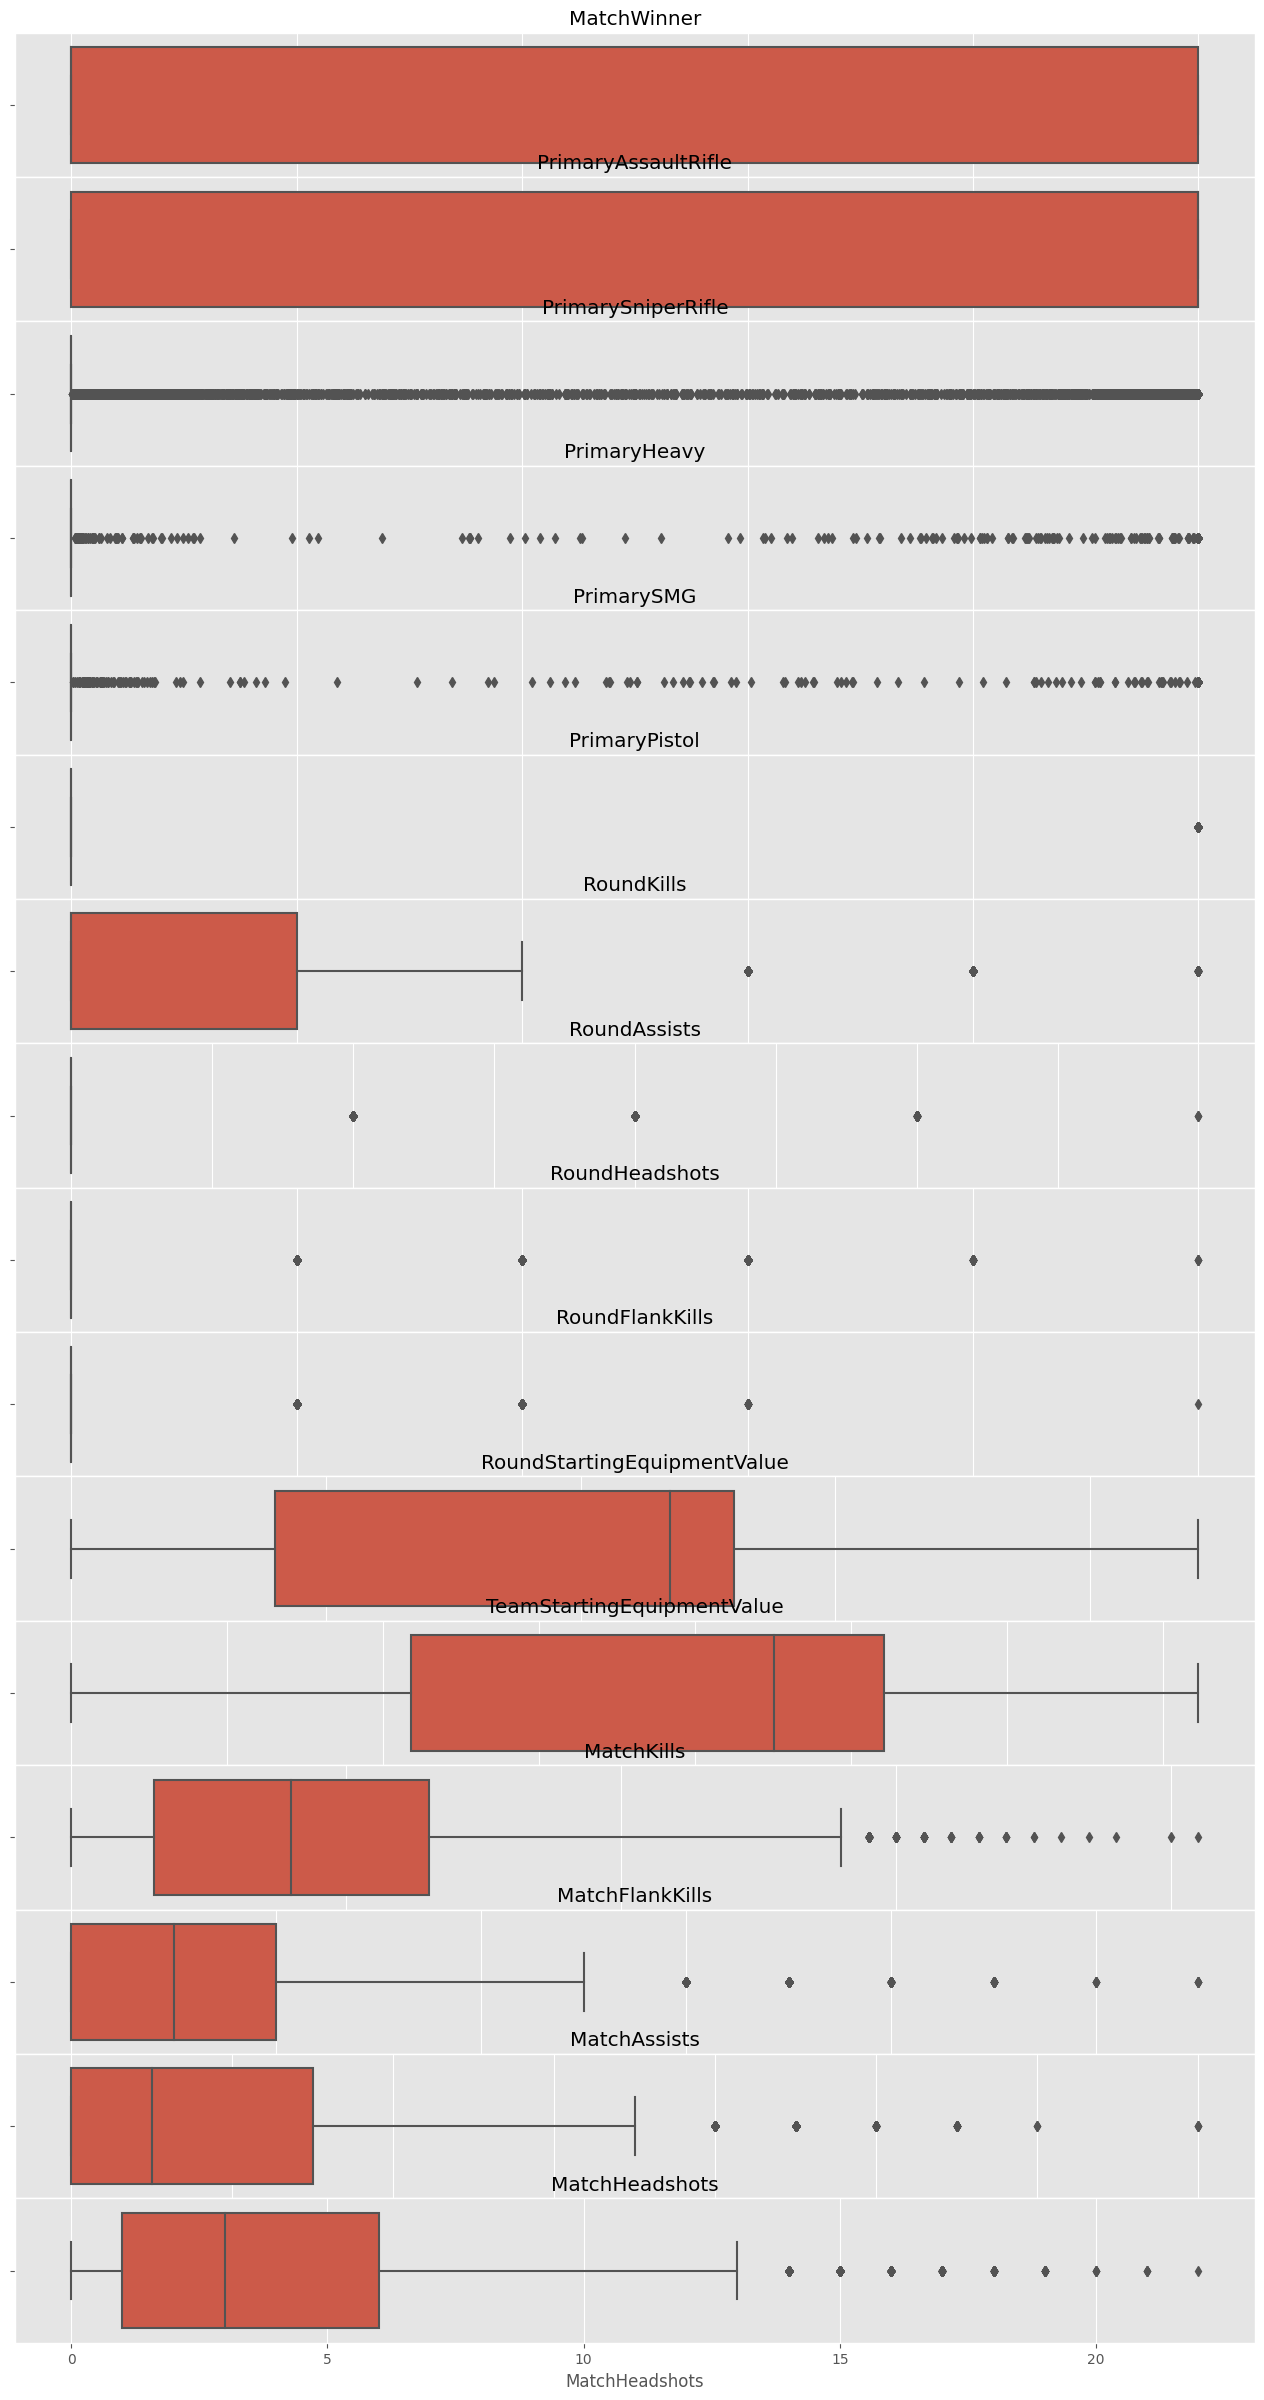

In [ ]:
# revisar outliers y valores extremos ....(cantidades numericas), datos negativos segun la variable
col_numericas=[ 'MatchWinner', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills','RoundAssists','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue','TeamStartingEquipmentValue','MatchKills','MatchFlankKills','MatchAssists','MatchHeadshots']

fig, ax= plt.subplots(nrows=16, ncols=1, figsize=(16,30))
fig.subplots_adjust(hspace=0)

for i, col in enumerate(col_numericas):
  sns.boxplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)

In [ ]:
df.head()

In [ ]:
df.isna().sum()


Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

Se identifican los nulos , donde Team tiene 2 y RoundWinner 1

In [ ]:
df1=df

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

In [ ]:
df1=df.dropna(axis=0,how='any') # eliminamos los datos nulos
df1.shape

(79154, 30)

In [ ]:
df1.isna().sum(axis=0) # ver los datos despues de eliminar los nulos

Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [ ]:
df1.shape

(79154, 30)

In [ ]:
#filas duplicados
print(f'tamaño del set antes de eliminar las filas duplicadas :{df1.shape}')
df1.drop_duplicates(inplace=True)
print(f'tamaño del set despues de eliminar las filas duplicadas :{df1.shape}')

tamaño del set antes de eliminar las filas duplicadas :(79154, 30)
tamaño del set despues de eliminar las filas duplicadas :(79154, 30)


In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
col_categoricas= ['Map', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance','Team', 'FirstKillTime']
for col in col_categoricas:
  print(f'Columna {col}: {df1[col].unique()}{df1[col].nunique()} subniveles')


Columna Map: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']4 subniveles
Columna RoundWinner: ['False' 'True' True False]4 subniveles
Columna MatchWinner: [True False]2 subniveles
Columna Survived: [False  True]2 subniveles
Columna AbnormalMatch: [False]1 subniveles
Columna TimeAlive: ['51.120.248.995.704.500' '4.348.662.552.266.170' '3.735.469.847.054.540'
 ... '5.914.717.797.783.930' '42.582.842.797.783.900'
 '8.004.793.109.418.280']51626 subniveles
Columna TravelledDistance: ['10.083.140.737.457.000' '60.960.883.184.688.400' '5.642.252.383.582.750'
 ... '6.005.168.938.274.500' '27.987.628.542.398.100'
 '9.867.724.708.696.010']77998 subniveles
Columna Team: ['Terrorist' 'CounterTerrorist']2 subniveles
Columna FirstKillTime: ['0.0' '373.547' '5.112.025' ... '59.147.180.000.000.000' '28.714.119'
 '438.720.474']33855 subniveles


RoundWinner: ['False' 'True' True False]4 subniveles

AbnormalMatch: [False]1 subniveles

In [ ]:
df1['Terrorist']= df['Team'].replace(['Terrorist', 'CounterTerrorist'],[0,1])#codificación binaria directa
df1['CounterTerrorist']= df['Team'].replace(['Terrorist', 'CounterTerrorist'],[1,0])
df1.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,1.0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,1.0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,1.0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0


In [ ]:
df1['Map'].value_counts(dropna=False)# reviso los datos para convertirlos a variables numericas

de_inferno    28866
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: Map, dtype: int64

In [ ]:
#convertir a variables numericas Se asigna el valor 1 si se observa y 0 en caso contrario.
df1['Map_de_inferno']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,0,1])
df1['Map_de_dust2']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,1,0])
df1['Map_de_mirage']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,1,0,0])
df1['Map_de_nuke']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[1,0,0,0])
df1.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist,Map_de_inferno,Map_de_dust2,Map_de_mirage,Map_de_nuke
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,1.0,0,0,0,1
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,1.0,0,0,0,1
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0,0,0,0,1
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,1.0,0,0,0,1
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0,0,0,0,1


Se eliminan las columnas que no utilizaremos.

In [ ]:
df1= df1.drop(['Unnamed: 0', 'MatchId', 'RoundId', 'RoundWinner', 'Survived', 'AbnormalMatch', 'TravelledDistance', 'Map', 'InternalTeamId','FirstKillTime'], axis=1)

In [ ]:
df1 = df1.drop(['TimeAlive'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Team                         79154 non-null  object 
 1   MatchWinner                  79154 non-null  object 
 2   RLethalGrenadesThrown        79154 non-null  int64  
 3   RNonLethalGrenadesThrown     79154 non-null  int64  
 4   PrimaryAssaultRifle          79154 non-null  float64
 5   PrimarySniperRifle           79154 non-null  float64
 6   PrimaryHeavy                 79154 non-null  float64
 7   PrimarySMG                   79154 non-null  float64
 8   PrimaryPistol                79154 non-null  int64  
 9   RoundKills                   79154 non-null  int64  
 10  RoundAssists                 79154 non-null  int64  
 11  RoundHeadshots               79154 non-null  int64  
 12  RoundFlankKills              79154 non-null  int64  
 13  RoundStartingEqu

In [ ]:
df1.shape

(79154, 26)

In [ ]:
#crear una nueva variable
df1["Total_granadas"] = df1.RLethalGrenadesThrown + df1.RNonLethalGrenadesThrown
df1.head()

,Team,MatchWinner,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist,Map_de_inferno,Map_de_dust2,Map_de_mirage,Map_de_nuke,Total_granadas
0,Terrorist,True,0,4,0.0,0.0,0.0,0.0,1,0,0,0,0,750,4400,0,0,0,0,0.0,1.0,0,0,0,1,4
1,Terrorist,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,800,4400,0,0,0,0,0.0,1.0,0,0,0,1,0
2,Terrorist,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0,0,0,0,1,0
3,Terrorist,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,850,4400,0,0,0,0,0.0,1.0,0,0,0,1,0
4,Terrorist,True,1,1,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0,0,0,0,1,2


In [ ]:
#crear una nueva variable
df1["TotalPorcj_armas_primarias"] = (df1.PrimaryAssaultRifle + df1.PrimarySniperRifle +df1.PrimaryPistol + df1.PrimaryHeavy + df1.PrimarySMG)
df1.head()

,Team,MatchWinner,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist,Map_de_inferno,Map_de_dust2,Map_de_mirage,Map_de_nuke,Total_granadas,TotalPorcj_armas_primarias
0,Terrorist,True,0,4,0.0,0.0,0.0,0.0,1,0,0,0,0,750,4400,0,0,0,0,0.0,1.0,0,0,0,1,4,1.0
1,Terrorist,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,800,4400,0,0,0,0,0.0,1.0,0,0,0,1,0,1.0
2,Terrorist,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0,0,0,0,1,0,1.0
3,Terrorist,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,850,4400,0,0,0,0,0.0,1.0,0,0,0,1,0,1.0
4,Terrorist,True,1,1,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0.0,1.0,0,0,0,1,2,1.0


In [ ]:
df1.info()

In [ ]:
df1 = df1.drop(['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryPistol', 'PrimaryHeavy', 'PrimarySMG','Team'], axis=1)

In [ ]:
#df1 = df1.drop(['Team', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'RoundWinner'], axis=1)

In [ ]:
df1.shape

(79154, 19)

In [ ]:
df1.columns


Index(['MatchWinner', 'RoundKills', 'RoundAssists', 'RoundHeadshots',
       'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Terrorist', 'CounterTerrorist',
       'Map_de_inferno', 'Map_de_dust2', 'Map_de_mirage', 'Map_de_nuke',
       'Total_granadas', 'TotalPorcj_armas_primarias'],
      dtype='object')

In [ ]:
#impureza de gini: mejor clasificador
A = df1[['RoundKills', 'RoundAssists', 'RoundHeadshots',
       'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Terrorist', 'CounterTerrorist',
       'Map_de_inferno', 'Map_de_dust2', 'Map_de_mirage', 'Map_de_nuke',
       'Total_granadas', 'TotalPorcj_armas_primarias']]
b = df1['MatchWinner']


KeyError: ignored

In [ ]:
gini_scores = []
for feature in A.columns:
    gini = 0
    values = A[feature].unique()
    for value in values:
        p = len(A[A[feature] == value]) / len(A)
        gini += p * (1 - p)
    gini_scores.append(gini)


In [ ]:
gini_scores_df1 = pd.DataFrame({'Variable': A.columns, 'Gini': gini_scores})
gini_scores_df1 = gini_scores_df1.sort_values(by='Gini', ascending=False)


In [ ]:
print(gini_scores_df1)


                       Variable      Gini
5    TeamStartingEquipmentValue  0.996284
4   RoundStartingEquipmentValue  0.956604
6                    MatchKills  0.950201
9                MatchHeadshots  0.896277
8                  MatchAssists  0.808438
16               Total_granadas  0.795890
7               MatchFlankKills  0.724312
0                    RoundKills  0.602423
10                    Terrorist  0.500000
11             CounterTerrorist  0.500000
15                  Map_de_nuke  0.463378
2                RoundHeadshots  0.391708
14                Map_de_mirage  0.366412
13                 Map_de_dust2  0.365089
12               Map_de_inferno  0.259856
1                  RoundAssists  0.236252
3               RoundFlankKills  0.161612
17   TotalPorcj_armas_primarias  0.058499


0= son los mejores clasificadores (0 perfecto)
0,5 =es la impureza maxima .
coeficiente de Gini más bajo indica un subconjunto más puro, donde los valores de la variable objetivo son más homogéneos

In [ ]:
#Se eliminan los que tienen malos resultados en el Gini
df1= df1.drop(['MatchKills', 'MatchHeadshots', 'MatchAssists', 'TeamStartingEquipmentValue', 'RoundStartingEquipmentValue', 'Total_granadas', 'MatchFlankKills', 'Terrorist', 'RoundKills', 'CounterTerrorist'], axis=1)

In [ ]:
df1.shape

(79154, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MatchWinner                 79154 non-null  object 
 1   RoundAssists                79154 non-null  int64  
 2   RoundHeadshots              79154 non-null  int64  
 3   RoundFlankKills             79154 non-null  int64  
 4   Map_de_inferno              79154 non-null  int64  
 5   Map_de_dust2                79154 non-null  int64  
 6   Map_de_mirage               79154 non-null  int64  
 7   Map_de_nuke                 79154 non-null  int64  
 8   TotalPorcj_armas_primarias  79154 non-null  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 6.0+ MB


In [ ]:
#df1=df

In [ ]:
df1.shape

(79157, 30)

#Variable categorica Target : MatchWinner
Esta es nuestra variable de interes sobre la que analizaremos los jugadores que ganan partidas y que caracteristicas  se consideran relevantes y se utilizan para explicar  la relación con la variable objetivo MatchWinner.

<Axes: xlabel='MatchWinner', ylabel='Density'>

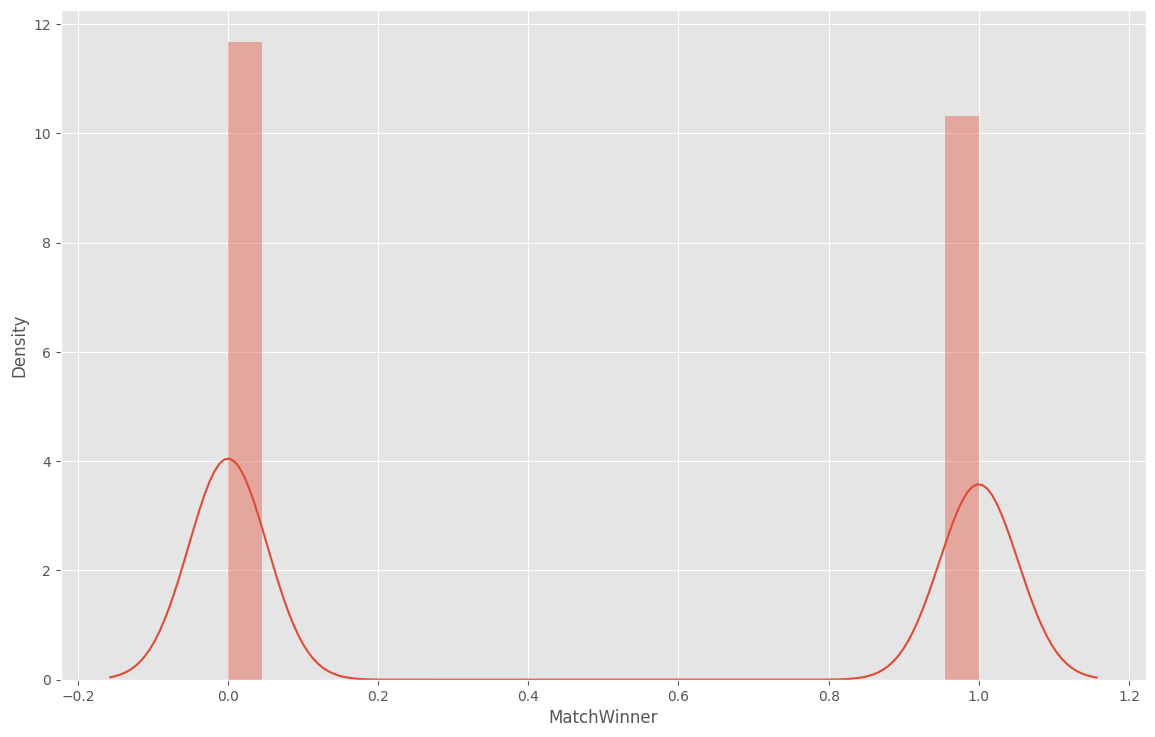

In [ ]:
sns.distplot(df1.MatchWinner)




## Fase 4: Modeling

### Clasificación



In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Realizar tarea de clasificación de datos orientado al caso entregado

In [ ]:
#[1,0]
df1['MatchWinner'].unique()

array([True, False], dtype=object)

## Vemos Desbalanceo

In [ ]:
df1['MatchWinner'] = df1['MatchWinner'].map({True: 1, False: 0})

In [ ]:
pd.value_counts(df1['MatchWinner'], sort = True)

0    42016
1    37138
Name: MatchWinner, dtype: int64

In [ ]:
# Extraemos la variable que vamos a estimar.
X = df1.drop(['MatchWinner'],axis=1)
y = df1['MatchWinner']


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RoundAssists                79154 non-null  int64  
 1   RoundHeadshots              79154 non-null  int64  
 2   RoundFlankKills             79154 non-null  int64  
 3   Map_de_inferno              79154 non-null  int64  
 4   Map_de_dust2                79154 non-null  int64  
 5   Map_de_mirage               79154 non-null  int64  
 6   Map_de_nuke                 79154 non-null  int64  
 7   TotalPorcj_armas_primarias  79154 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 5.4 MB


In [ ]:
y.unique() # vemos las clases

array([1, 0])

In [ ]:
#Pierde_df1 = df1[df1.MatchWinner == 0] #pierde partida
#Gana_df1 = df1[df1.MatchWinner == 1] #gana partida

## Creamos Dataset

In [ ]:
y = df1['MatchWinner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
LABELS = ['Pierde','Gana']

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero MatchWinner')
    plt.xlabel('Predicted MatchWinner')
    plt.show()
    print (classification_report(y_test, pred_y))

Esta función se utiliza para visualizar la matriz de confusión y mostrar un informe de clasificación con métricas de evaluación para un modelo de clasificación.

y_test :son los valores reales del conjunto de datos de prueba, las etiquetas o la variable objetivo que se   trata de predecir.
pred_y : son las predicciones del modelo en el conjunto de datos de prueba.

Que jugadores van a ganar la partida y segun ciertas caracteristicas

Dividir tus datos en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Ejecutamos Modelo Regresion Logistica


###Se ajusta directamente con parámetros predefinidos

In [ ]:
#entrena cada modelo de manera independiente sin ajuste exhaustivo de hiperparámetros.y se almacena en una variable específica ,permite utilizar cada modelo por separado para realizar predicciones
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier


# Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Crear y entrenar el modelo de Árbol de Decisión
#dt_model = DecisionTreeClassifier()
#dt_model.fit(X_train, y_train)



LogisticRegression()

Logistic Regression:


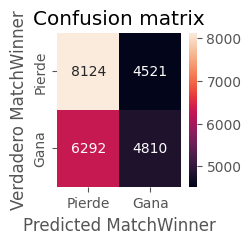

              precision    recall  f1-score   support

           0       0.56      0.64      0.60     12645
           1       0.52      0.43      0.47     11102

    accuracy                           0.54     23747
   macro avg       0.54      0.54      0.54     23747
weighted avg       0.54      0.54      0.54     23747



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar el modelo de Regresión Logística
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression:")
mostrar_resultados(y_test, logistic_pred)


MODELO REGRESION LOGISTICA
Precisión: Es la proporción de predicciones correctas de la clase positiva , sobre el total de predicciones positivas.. el 62% de las predicciones clasificadas como clase 0 son correctas, y el 58% de las predicciones clasificadas como clase 1 son correctas.

Recall(sensibilidad): Es la proporción de instancias de la clase positiva que se identifican correctamente sobre el total de instancias reales de esa clase se identificaron correctamente el 66% de las instancias reales de la clase 0, y el 53% de las instancias reales de la clase 1.

F1-score: Es una medida de la media entre la precisión y el recall. En este caso, el F1-score para la clase 0 es de 0.64 y para la clase 1 es de 0.56.

Support: el conjunto de prueba contiene 12,645 observaciones de la clase 0 y 11,102 observaciones de la clase 1.

Accuracy: Es la proporción de predicciones correctas sobre el total de predicciones realizadas. El 60% de las predicciones son correctas.













###Se hace una búsqueda de los mejores hiperparámetros utilizando validación cruzada.

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2'}
Mejor score: 0.5439925109879391


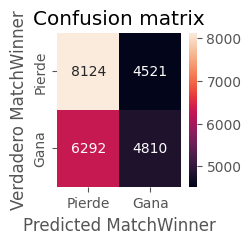

              precision    recall  f1-score   support

           0       0.56      0.64      0.60     12645
           1       0.52      0.43      0.47     11102

    accuracy                           0.54     23747
   macro avg       0.54      0.54      0.54     23747
weighted avg       0.54      0.54      0.54     23747



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#modelo entrenado para encontrar los mejores hiperparametros
# Crear el objeto del modelo
model_lr = LogisticRegression()

# Definir los hiperparámetros a ajustar
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5)

# Entrenar el modelo con los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search_lr.best_params_
best_score = grid_search_lr.best_score_

# Mostrar los mejores hiperparámetros y el mejor score
print("Mejores hiperparámetros:", best_params)
print("Mejor score:", best_score)

# Obtener las predicciones en el conjunto de prueba
pred_y_lr = grid_search_lr.predict(X_test)

# Mostrar los resultados
mostrar_resultados(y_test, pred_y_lr)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Regresión Logística con los mejores hiperparámetros
logistic_model = LogisticRegression(C=0.1, penalty='l2')
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calcular la precisión (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión del modelo
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.5446582726239104


In [ ]:
from sklearn.metrics import roc_auc_score
roc_value_lr = roc_auc_score(y_test, logistic_pred)
print("Area bajo la curva ROC")
print("Logistic Regression:")
print(roc_value_lr)

Area bajo la curva ROC
Logistic Regression:
0.537861323865641


##Ejecutamos Modelo Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
rf_model.fit(X_train, y_train)


##Ejecutamos Modelo Arbol de decision

Logistic Regression:


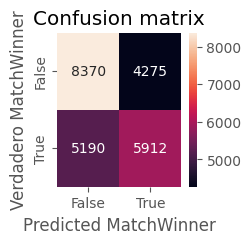

              precision    recall  f1-score   support

           0       0.62      0.66      0.64     12645
           1       0.58      0.53      0.56     11102

    accuracy                           0.60     23747
   macro avg       0.60      0.60      0.60     23747
weighted avg       0.60      0.60      0.60     23747

Decision Tree:


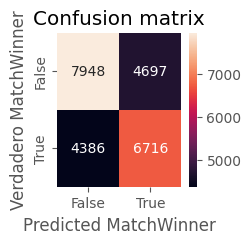

              precision    recall  f1-score   support

           0       0.64      0.63      0.64     12645
           1       0.59      0.60      0.60     11102

    accuracy                           0.62     23747
   macro avg       0.62      0.62      0.62     23747
weighted avg       0.62      0.62      0.62     23747



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished




Random Forest:


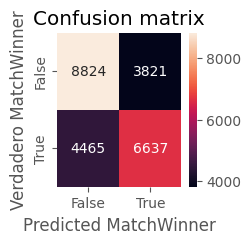

              precision    recall  f1-score   support

           0       0.66      0.70      0.68     12645
           1       0.63      0.60      0.62     11102

    accuracy                           0.65     23747
   macro avg       0.65      0.65      0.65     23747
weighted avg       0.65      0.65      0.65     23747



In [ ]:


# Evaluar el modelo de Árbol de Decisión
dt_pred = dt_model.predict(X_test)
print("Decision Tree:")
mostrar_resultados(y_test, dt_pred)

# Evaluar el modelo de Random Forest
rf_pred = rf_model.predict(X_test)
print("")
print("")

print("Random Forest:")

mostrar_resultados(y_test, rf_pred)


MODELO ARBOL DE DECISION
La precisión del modelo es del 62%, lo que indica un rendimiento promedio en la clasificación del conjunto de prueba.

---



MODELO RANDOM FOREST
La precisión para la clase 0 es del 66% y para la clase 1 es del 63%. Esto significa que de todas las instancias clasificadas como positivas o negativas por el modelo, el 66% de las clasificadas como clase 0 son realmente de esa clase, y el 63% de las clasificadas como clase 1 son realmente de esa clase.
Muestra un rendimiento ligeramente mejor que el modelo de árbol de decisión y regresión logística, con valores más altos de precisión, recall y F1-score para ambas clases.

In [ ]:
from sklearn.metrics import roc_auc_score
#roc_value_lr = roc_auc_score(y_test, logistic_pred)
roc_value_dt = roc_auc_score(y_test, dt_pred)
roc_value_rf = roc_auc_score(y_test, rf_pred)


print("Area bajo la curva ROC")
print("Logistic Regression:")
print(roc_value_lr)
print("Decision Tree:")
print(roc_value_dt)
print("Random Forest:")
print(roc_value_rf)

Area bajo la curva ROC
Logistic Regression:
0.597219185924629
Decision Tree:
0.6167424405450191
Random Forest:
0.6478227199684525


Nivel de exactitud de este modelo.  construir múltiples árboles de decisión y combinar sus predicciones,

##Random Forest

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

## Fase 5: Evaluation

In [ ]:
#capacidad del modelo para clasificar correctamente los casos positivos y negativos
print(roc_value_rf)

0.6478227199684525


El modelo tiene una capacidad de discriminación moderada para distinguir entre las clases positivas y negativas. Cuanto más cercano a 1 sea el valor, mejor será la capacidad de discriminación del modelo. La capacidad del modelo para distinguir correctamente entre las diferentes clases o categorías de la variable objetivo,a la capacidad del modelo para clasificar correctamente los casos positivos como positivos y los casos negativos como negativos.Un modelo con una buena discriminación tiene la capacidad de separar claramente las diferentes clases en función de las características y los patrones de los datos. Esto implica que el modelo puede identificar correctamente los casos positivos y negativos, lo que resulta en una clasificación más precisa y confiable.



Proceso de entrenamiento :GRIDSEARCHCV

Regresion logaritmica


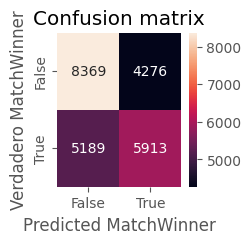

              precision    recall  f1-score   support

           0       0.62      0.66      0.64     12645
           1       0.58      0.53      0.56     11102

    accuracy                           0.60     23747
   macro avg       0.60      0.60      0.60     23747
weighted avg       0.60      0.60      0.60     23747

Random Forest


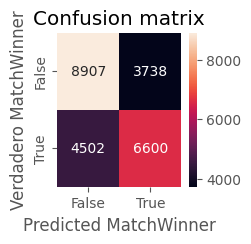

              precision    recall  f1-score   support

           0       0.66      0.70      0.68     12645
           1       0.64      0.59      0.62     11102

    accuracy                           0.65     23747
   macro avg       0.65      0.65      0.65     23747
weighted avg       0.65      0.65      0.65     23747

Arbol de decision


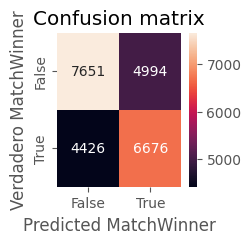

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     12645
           1       0.57      0.60      0.59     11102

    accuracy                           0.60     23747
   macro avg       0.60      0.60      0.60     23747
weighted avg       0.60      0.60      0.60     23747



In [ ]:
#proceso de entrenamiento búsqueda de hiperparámetros y la validación cruzada simultáneamente.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Crear el objeto del modelo
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_dt = DecisionTreeClassifier()

# Definir los hiperparámetros a ajustar para LogisticRegression
param_grid_lr = {'C': [0.1, 1.0, 10.0],
                 'penalty': ['l1', 'l2']}

# Definir los hiperparámetros a ajustar para RandomForestClassifier
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

# Definir los hiperparámetros a ajustar para DecisionTreeClassifier
param_grid_dt = {'max_depth': [None, 10, 20],
                   'min_samples_split': [2, 5, 10]}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5)
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5)
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5)

# Entrenar el modelo con los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)

# Obtener las predicciones en el conjunto de prueba
pred_y_lr = grid_search_lr.predict(X_test)
pred_y_rf = grid_search_rf.predict(X_test)
pred_y_dt = grid_search_dt.predict(X_test)

# Mostrar los resultados
print("Regresion log")
mostrar_resultados(y_test, pred_y_lr)
print("Random Forest")
mostrar_resultados(y_test, pred_y_rf)
print("Arbol de decision")
mostrar_resultados(y_test, pred_y_dt)


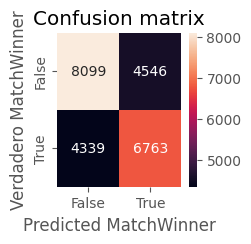

              precision    recall  f1-score   support

           0       0.65      0.64      0.65     12645
           1       0.60      0.61      0.60     11102

    accuracy                           0.63     23747
   macro avg       0.62      0.62      0.62     23747
weighted avg       0.63      0.63      0.63     23747

Excatitud: 0.6258474754705857
Precisión: 0.5980192766822885
Recall: 0.6091695190055846
F1-score: 0.6035429030386864


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear una instancia del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors es el valor de k

# Entrenar el modelo con datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones en datos de prueba
y_pred = knn_model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mostrar_resultados(y_test, y_pred)
# Imprimir las métricas
print("Excatitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


## Ensamblados

Ensamblados Regresion logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
molo = LogisticRegression()
model_lo = BaggingClassifier(molo, n_estimators=10)

params = {
    "base_estimator__C": [0.1, 1.0, 10.0],
    "max_samples": [0.1, 0.2],
    "base_estimator__penalty": ['l1', 'l2']
}

gridLO = GridSearchCV(estimator=model_lo, param_grid=params, cv=5)
_ = gridLO.fit(Xtrain, ytrain)


In [ ]:
print("Mejores parámetros encontrados:")
print(gridLO.best_params_)
print("Mejor puntaje de validación cruzada:")
print(gridLO.best_score_)

Mejores parámetros encontrados:
{'base_estimator__C': 10.0, 'base_estimator__penalty': 'l2', 'max_samples': 0.1}
Mejor puntaje de validación cruzada:
0.6003190457034735


Ensamblado: Random Forest

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
moran = RandomForestClassifier()
model_ran = BaggingClassifier(moran, n_estimators=10)

params = {"base_estimator__max_depth": [2,3],
          "max_samples": [0.1,0.2],
          "base_estimator__min_samples_split": [2,3,4]}
gridRF = GridSearchCV(estimator=model_ran, param_grid=params,cv=5)
_=gridRF.fit(Xtrain, ytrain)


In [ ]:
print("Mejores parámetros encontrados:")
print(gridRF.best_params_)
print("Mejor puntaje de validación cruzada:")
print(gridRF.best_score_)

Mejores parámetros encontrados:
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 4, 'max_samples': 0.2}
Mejor puntaje de validación cruzada:
0.6000978043708083


Ensambado : Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
mo = DecisionTreeClassifier()
model_en = BaggingClassifier(mo, n_estimators=10)

params = {"base_estimator__max_depth": [2,3],
          "max_samples": [0.1,0.2],
          "base_estimator__min_samples_split": [2,3,4]}
grid = GridSearchCV(estimator=model_en, param_grid=params,cv=5)
_=grid.fit(Xtrain, ytrain)

In [ ]:
print(grid.best_score_)
print("combinación óptima de hiperparámetros para el modelo")
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.5996873661851806
combinación óptima de hiperparámetros para el modelo
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 4, 'max_samples': 0.2}


El valor 0.5996873661851806 es el resultado del proceso de optimización del modelo

GridSearchCV. Esta clase realiza una búsqueda exhaustiva de las mejores combinaciones de hiperparámetros utilizando validación cruzada.

-Bagging es una técnica de ensamblado que combina múltiples modelos de aprendizaje en paralelo para mejorar la precisión y la estabilidad de las predicciones.

VISUALIZACION DE 1 SOLO ARBOL.Con el mejor conjunto de hiperparametros

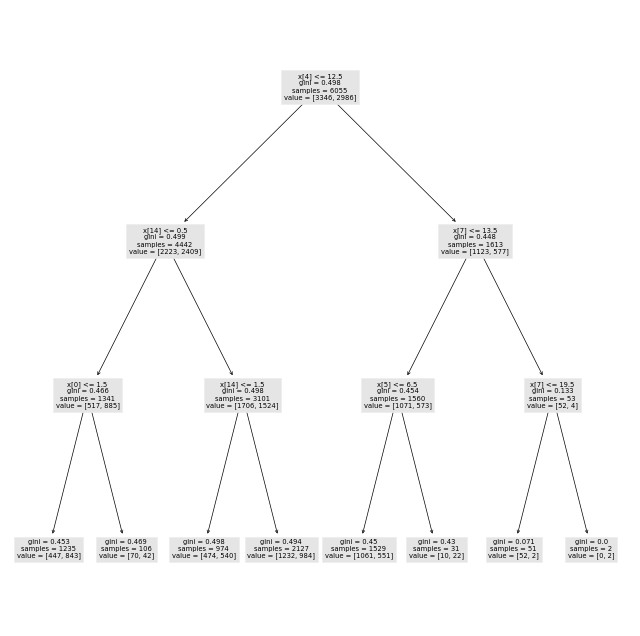

In [ ]:
# Visualizamos 1 sólo árbol dentro del "bosque" generado por Bagging con el mejor conjunto de hiperparámetros encontrado durante el proceso de optimización.
import matplotlib.pyplot as plt
from sklearn import tree

mo_ = grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(8,8))
_= tree.plot_tree(mo_)

 El valor gini esta en cada nodo alrededor de  0,499 indica una moderada desigualdad de los datos, ya que un valor de Gini de 0 indica una partición perfectamente pura, donde todos los elementos en el nodo pertenecen a la misma clase. Un valor de Gini más alto indica una mayor impureza en el nodo, lo que significa que hay una mezcla de diferentes clases en el nodo.

 La matriz de confusión y el informe de clasificación para evaluar el rendimiento de un modelo de clasificación en un conjunto de datos de prueba.

In [ ]:
#La matriz de confusión muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Regresión Logística - Precisión: 0.5977
Random Forest - Precisión: 0.5652
Ensamblados - Precisión: 0.5814


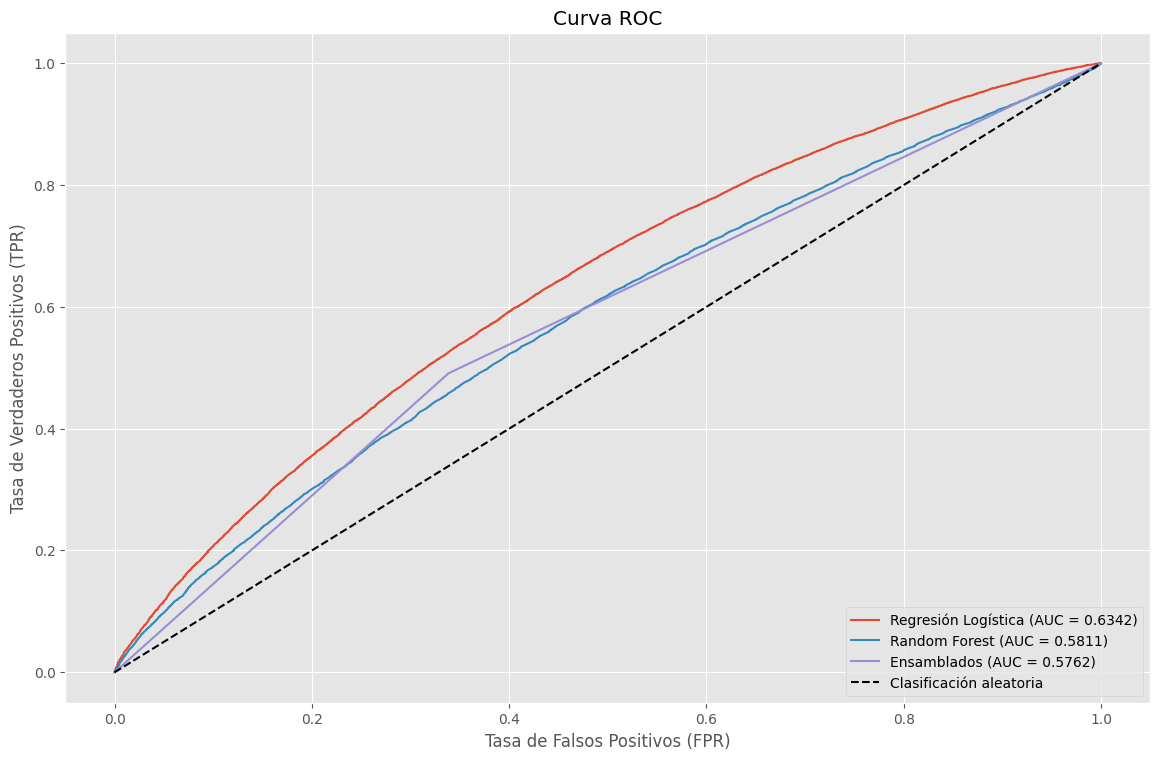

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Crear instancias de los modelos
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
ensemble = VotingClassifier(estimators=[('lr', logistic_regression), ('rf', random_forest)], voting='soft')

# Validación cruzada y obtención de predicciones
models = [logistic_regression, random_forest, ensemble]
model_names = ['Regresión Logística', 'Random Forest', 'Ensamblados']

for i, model in enumerate(models):
    # Validación cruzada
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_names[i]} - Precisión: {scores.mean():.4f}")

    # Obtención de predicciones
    if isinstance(model, VotingClassifier):
        y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    else:
        y_pred = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc:.4f})')

# Configuración del gráfico

plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Regresión Logística  con un AUC =0,6342 indica que tiene un rendimiento moderado en la clasificación de instancias positivas y negativas. Un valor de 0.63 indica que el modelo tiene una capacidad razonable para distinguir entre las clases y tomar decisiones de clasificación.

En la curva ROC, se busca que el área bajo la curva (AUC) sea lo más cercana posible a 1, ya que esto indica un mejor rendimiento del modelo. Un AUC de 0.5 indica un rendimiento aleatorio o similar al azar, mientras que un AUC de 1 indica un rendimiento perfecto en relacion a la capacidad de discriminación entre las clases positiva y negativa.






La curva se crea trazando la tasa de verdaderos positivos (TPR) en el eje y y la tasa de falsos positivos (FPR) en el eje x para diferentes valores de umbral.

## Fase 5: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(ytest, Yhat))
print(classification_report(ytest, Yhat))

[[6268 2195]
 [4237 3131]]
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      8463
           1       0.59      0.42      0.49      7368

    accuracy                           0.59     15831
   macro avg       0.59      0.58      0.58     15831
weighted avg       0.59      0.59      0.58     15831



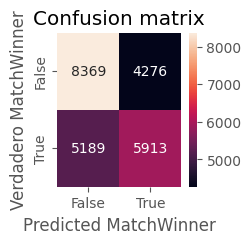

              precision    recall  f1-score   support

           0       0.62      0.66      0.64     12645
           1       0.58      0.53      0.56     11102

    accuracy                           0.60     23747
   macro avg       0.60      0.60      0.60     23747
weighted avg       0.60      0.60      0.60     23747



In [ ]:
#esta con los mejores hiperparametros
logistic_model_final = LogisticRegression(C=10.0, penalty='l2')
logistic_model_final.fit(X_train, y_train)
pred_y_final = logistic_model_final.predict(X_test)
mostrar_resultados(y_test, pred_y_final)
#new_data_predictions = logistic_model_final.predict(new_data)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
# Ajustar los hiperparámetros utilizando GridSearchCV para Regresión Logística
param_grid_lr = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
# Obtener los mejores hiperparámetros para Regresión Logística
best_params_lr = grid_search_lr.best_params_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Regresión Logística:", best_params_lr)


Mejores hiperparámetros para Regresión Logística: {'C': 10.0, 'penalty': 'l2'}


In [ ]:
# Ajustar los hiperparámetros utilizando GridSearchCV para Árbol de Decisión

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
param_grid_dt = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Obtener los mejores hiperparámetros para Árbol de Decisión
best_params_dt = grid_search_dt.best_params_
print("Mejores hiperparámetros para Árbol de Decisión:", best_params_dt)


Mejores hiperparámetros para Árbol de Decisión: {'max_depth': 10, 'min_samples_split': 5}


###Probamos con Random Forest.....


In [ ]:
# busca los mejores hiperparametroa para ajustarlos en el codigo
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
# Ajustar los hiperparámetros utilizando GridSearchCV para Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search_rf = GridSearchCV(estimator= model_rf, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores hiperparámetros para Random Forest
best_params_rf = grid_search_rf.best_params_

# Mostrar los mejores hiperparámetros encontrados

print("Mejores hiperparámetros para Random Forest:", best_params_rf)


Mejores hiperparámetros para Random Forest: {'max_depth': None, 'n_estimators': 200}


In [ ]:
from sklearn.linear_model import LogisticRegression

# Ajustar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X, y)

# Obtener los coeficientes del modelo
coeficientes = model.coef_

# Obtener los nombres de las variables predictoras
nombres_variables = X.columns

# Crear un dataframe para visualizar los coeficientes
df_coeficientes = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes.flatten()})

# Ordenar los coeficientes de forma descendente por su magnitud absoluta
df_coeficientes['Magnitud'] = df_coeficientes['Coeficiente'].abs()
df_coeficientes = df_coeficientes.sort_values('Magnitud', ascending=False)

# Imprimir los coeficientes en orden descendente
print(df_coeficientes)


                      Variable  Coeficiente  Magnitud
15  TotalPorcj_armas_primarias     0.276020  0.276020
9             CounterTerrorist     0.216406  0.216406
1                 RoundAssists    -0.199345  0.199345
0                   RoundKills    -0.150594  0.150594
14              Total_granadas    -0.125725  0.125725
11                Map_de_dust2     0.105606  0.105606
6                 MatchAssists    -0.095362  0.095362
12               Map_de_mirage     0.094102  0.094102
8                    Terrorist     0.059615  0.059615
10              Map_de_inferno     0.056883  0.056883
4                   MatchKills    -0.052235  0.052235
5              MatchFlankKills     0.031594  0.031594
3              RoundFlankKills    -0.028777  0.028777
13                 Map_de_nuke     0.019429  0.019429
7               MatchHeadshots     0.013734  0.013734
2               RoundHeadshots    -0.010995  0.010995


Este código solo muestra los resultados de evaluación y visualización, pero necesitas entrenar y ajustar los modelos por separado antes de utilizarlo.






Coeficientes con valores más altos (positivos o negativos) indicarán una mayor influencia en la predicción.
TotalPorcj_armas_primarias:coeficiente positivo=0.276020,  un incremento en ella está asociado con un aumento en la probabilidad de ser el ganador del partido. La magnitud del coeficiente sugiere que esta variable tiene una influencia significativa en la predicción.

CounterTerrorist: coeficiente positivo de 0.216406, lo que indica que estar en este equipo está asociado con una mayor probabilidad de ser el ganador del partido.

RoundAssists: coeficiente negativo =-0.199345, lo que sugiere que un aumento en el número de asistencias por ronda está relacionado con una disminución en la probabilidad de ser el ganador del partido.
RoundKills,Total_granadas: coeficientes negativos, lo que indica que un incremento en el número de kills por ronda y en el número total de granadas utilizadas están asociados con una disminución en la probabilidad de ser el ganador del partido.
Los coeficientes de regresión representan la relación relativa entre una variable predictora y la variable objetivo, es decir, cómo un cambio en la variable predictora se relaciona con un cambio proporcional en la variable objetivo.











Evaluamos el modelo nuevamente pero solo con algunas caracteristicas con mejor correlacion

el modelo tiene una precisión y recall bastante similares para ambas clases, lo que indica que no hay un sesgo hacia una clase en particular. El F1-score también es relativamente similar para ambas clases. La precisión global del modelo es del 60%, lo que indica que está clasificando correctamente el 60% de las instancias en general.

Para determinar si el modelo es adecuado o no, es importante considerar otras métricas de evaluación, como el área bajo la curva ROC (AUC-ROC)que evaluar la capacidad de discriminación del modelo y la curva ROC para visualizar el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos a través de diferentes umbrales de clasificación.

este código se utiliza para entrenar un modelo de regresión logística balanceado y obtener el modelo ajustado para su posterior uso en la predicción y evaluación.




